<a href="https://colab.research.google.com/github/PGCodehub/BasicNeworks/blob/master/Deep_RL_intialcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intial Codes for colab


In [1]:
from PIL import Image

#workaround 

!pip install --no-cache-dir -I pillow
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
print("done!")
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

print("done!")


    100% |████████████████████████████████| 2.0MB 66.3MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


done!
done!


In [1]:
#PYDRIVE AND GOOGLE AUTHENTICATION CELL

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveauth = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.7MB/s 


In [5]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = '/content/gdrive/My Drive/'  #change dir to your project folder


In [3]:
#PYTORCH CELL (TO RUN PYTORCH)

# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu90' if path.exists('/opt/bin/nvidia-smi') else 'cpu'



!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

    100% |████████████████████████████████| 519.5MB 54.8MB/s 
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.49 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.


In [0]:
# Imports here
import torch 
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image



#Intial code for RL from Udacity Github Method 1

In [6]:
!sudo apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev ffmpeg xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  gir1.2-ibus-1.0 libcapnp-0.6.1 libdbus-1-dev libdmx-dev libdmx1
  libfontenc-dev libfs-dev libfs6 libibus-1.0-5 libibus-1.0-dev
  libmirclient-dev libmirclient9 

In [7]:
!pip install pyvirtualdisplay

  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
Successfully built pyvirtualdisplay EasyProcess


In [8]:
!pip install piglet

    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 92kB 7.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [9]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:


# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

##runing env og gym in colab 

In [12]:
%cd /content/

!ls

/content
adc.json  gdrive  sample_data


In [13]:
!git clone https://github.com/openai/gym.git


Cloning into 'gym'...
remote: Enumerating objects: 9219, done.
remote: Total 9219 (delta 0), reused 0 (delta 0), pack-reused 9219
Receiving objects: 100% (9219/9219), 3.70 MiB | 19.31 MiB/s, done.
Resolving deltas: 100% (6247/6247), done.
/content/gym
Obtaining file:///content/gym
  Found existing installation: gym 0.10.11
    Uninstalling gym-0.10.11:
      Successfully uninstalled gym-0.10.11
  Running setup.py develop for gym


In [19]:
%cd /content/gym/

!ls

!pip install -e .

/content/gym
bin		     Makefile		    test.dockerfile.16.04
CODE_OF_CONDUCT.rst  README.rst		    test.dockerfile.18.04
docs		     requirements_dev.txt   tox.ini
examples	     requirements.txt	    unittest.cfg
gym		     scripts		    vendor
gym.egg-info	     setup.py
LICENSE.md	     test.dockerfile.14.04
Obtaining file:///content/gym
  Found existing installation: gym 0.12.1
    Can't uninstall 'gym'. No files were found to uninstall.
  Running setup.py develop for gym


In [20]:
!pip install gym[all]

    100% |████████████████████████████████| 450kB 10.2MB/s 
    100% |████████████████████████████████| 768kB 25.6MB/s 
  Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
  Stored in directory: /root/.cache/pip/wheels/c5/53/f9/fd31798dce7e10aa49f8354e4111b9c9cad10c894184658663
Successfully built glfw
Failed to build mujoco-py
  Running setup.py install for mujoco-py ... error
Command "/usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-0ad_x5z_/mujoco-py/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-ukey0dgm/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-install-0ad_x5z_/mujoco-py/


In [0]:
import gym
env = gym.make("")

#plt.imshow(env.render('rgb_array'))

#env.render('rgb_array')


#print("Observation space:", env.observation_space)
#print("Action space:", env.action_space)

### Specific Env

#####Atari

In [52]:
# for installing specific envirnments

%cd /content/gym/gym/envs/

!ls

!python __init__.py.

!pip install -e '.[atari]'



/content/gym/gym/envs
algorithmic  box2d	      __init__.py  README.md	    robotics  toy_text
atari	     classic_control  mujoco	   registration.py  tests     unittest
python3: can't open file '__init__.py.': [Errno 2] No such file or directory
File "setup.py" not found. Directory cannot be installed in editable mode: /content/gym/gym/envs


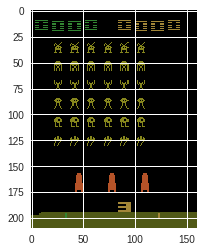

In [21]:
import gym
env = gym.make('SpaceInvaders-v0')
env.reset()


plt.imshow(env.render('rgb_array'))


#####Box2d

In [42]:
# for installing specific envirnments

%cd  /content/

!ls




/content
adc.json  gdrive  gym  sample_data


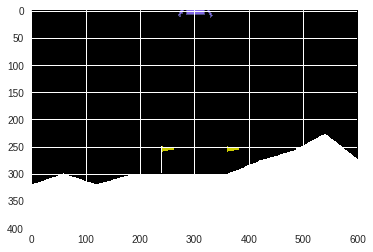

In [22]:
env2 = gym.make('LunarLander-v2')
env2.reset()


plt.imshow(env2.render('rgb_array'))


#Intial Code for Rl ifrom uidacity Github Method2

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
import IPython
from IPython.display import HTML

In [9]:
#eg screen resolution 1400x900

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    IPython.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

In [0]:
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [0]:
#Now, in your OpenAi gym code, where you would have usually declared what environment you are using we need
#to “wrap” that environment using the wrap_env function that we declared above.

#Where ENV_NAME is the environment that are using from Gym, eg 'CartPole-v0'

env = wrap_env(gym.make(ENV_NAME)) #wrapping the env to render as a video

#Don’t forget to call env.render() at some point during the training phase of your algorithm so that Gym itself
#enters “render mode”.

#Finally, right at the end of your algorithm we need to call our second helper function “show_video” to show
#our stacked frames using this method & render our environment.


show_video()


###specific env

In [0]:
from IPython import display as ipythondisplay

In [30]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)


In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

## Pacman!

In [0]:
env = wrap_env(gym.make("MsPacman-v0"))

In [38]:
#check out the pacman action space!
print(env.action_space)

Discrete(9)


In [39]:
observation = env.reset()

while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
         
    observation, reward, done, info = env.step(action) 
   
        
    if done: 
      break;
            
env.close()
show_video()

### other test yet to be performed

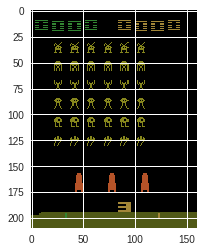

In [40]:
env2 =  wrap_env(gym.make('SpaceInvaders-v0')) #wrapping the env to render as a video

env2.reset()


plt.imshow(env2.render('rgb_array'))

In [41]:
show_video()

